In [28]:
import pandas as pd
import numpy as np
from __future__ import print_function #add compatibility

In [29]:
!pip install xlrd

In [30]:
df_can = pd.read_excel('Canada.xlsx', sheet_name = 'Canada by Citizenship', skiprows = range(20), skipfooter = 2)

In [31]:
#prepare dataset: delete col, remane the rest and reset index

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [32]:
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


# Plot area for top 5 countries - Scripting Layer

In [33]:
years = list(map(int, range(1980, 2014)))

In [34]:
df_top5 = df_can.head(5)
df_top5 = df_top5[years].T

In [35]:
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [36]:
import matplotlib as mpl
%matplotlib inline 

import matplotlib.pyplot as plt

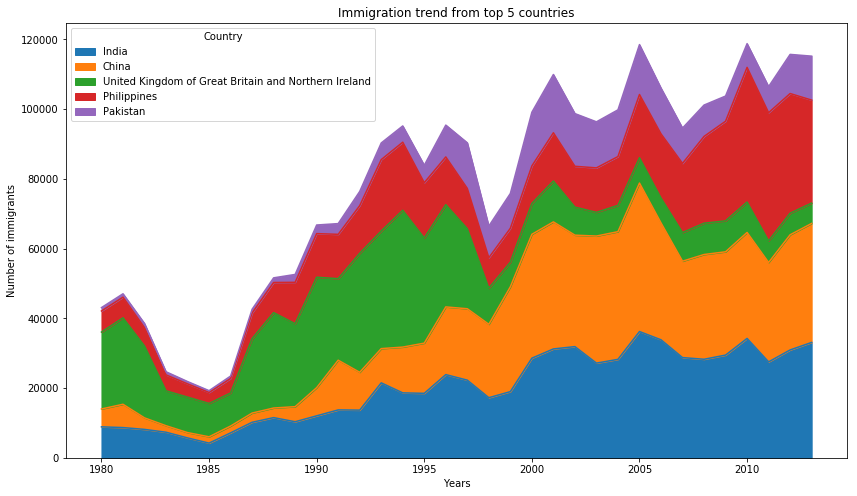

In [42]:
df_top5.plot(kind='area', figsize=(14, 8))

plt.title('Immigration trend from top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

# Plot histogram

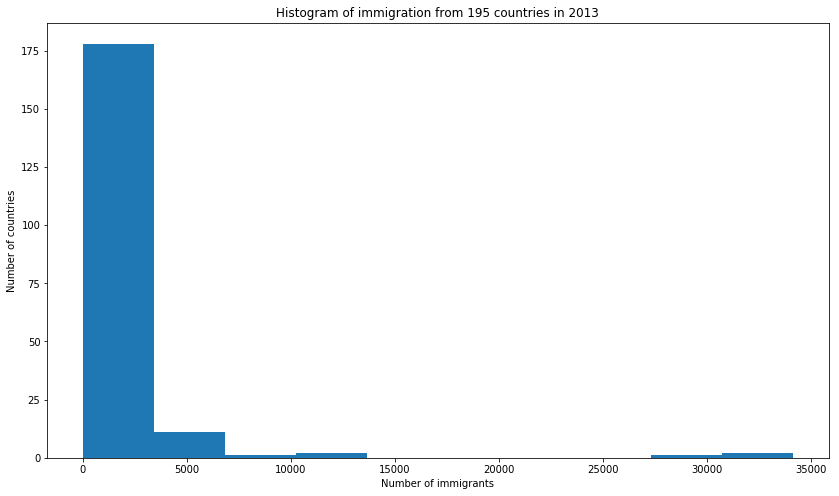

In [41]:
df_can.columns = list(map(str, df_can.columns)) #convert the column names into strings: '1980' to '2013' to avoid ambiguity

df_can['2013'].plot(kind='hist', figsize=(14, 8))

plt.title('Histogram of immigration from 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')

plt.show()

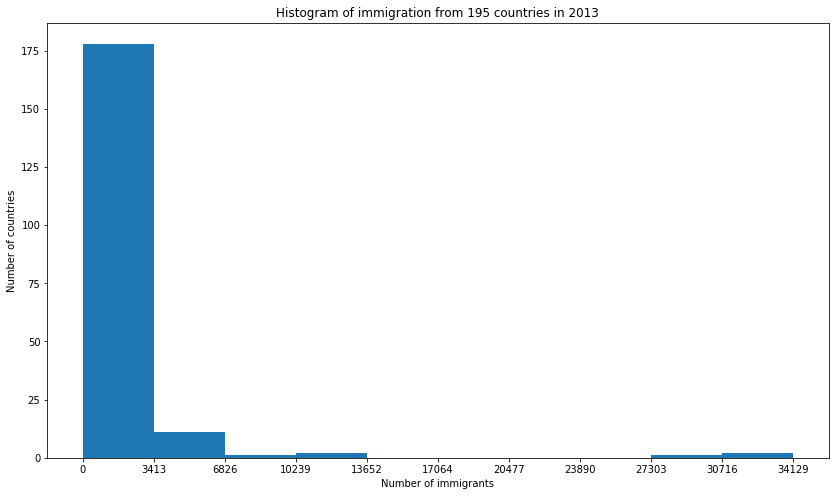

In [40]:
#more readable xtixks

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind = 'hist', xticks = bin_edges, figsize=(14, 8))

plt.title('Histogram of immigration from 195 countries in 2013')
plt.ylabel('Number of countries')
plt.xlabel('Number of immigrants')

plt.show()

# Plot bar charts

In [51]:
years = years = list(map(str, range(1980, 2014)))

df_iceland = df_can.loc['Iceland', years]

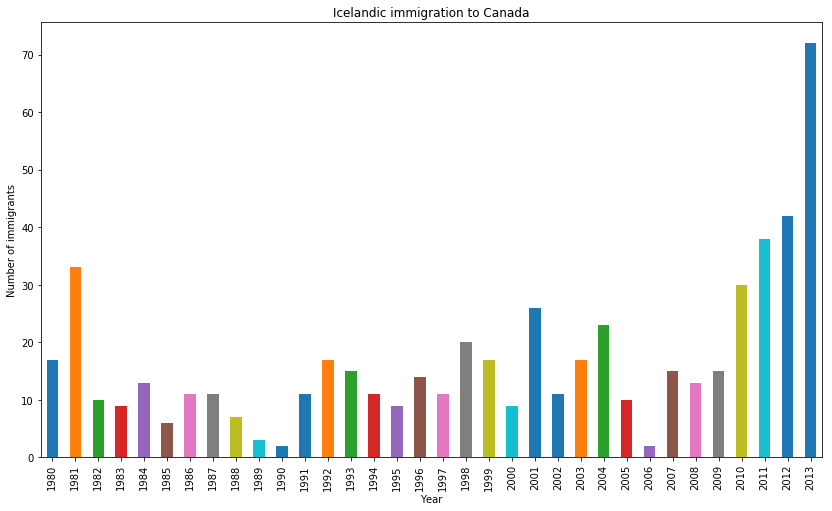

In [53]:
df_iceland.plot(kind='bar', figsize=(14, 8))

plt.title('Icelandic immigration to Canada')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

plt.show()


# Lab

In [54]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

True

In [55]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [65]:
print(plt.style.available)
mpl.style.use('bmh')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [57]:
type(df_can['2013'])

pandas.core.series.Series

Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass stacked=False.

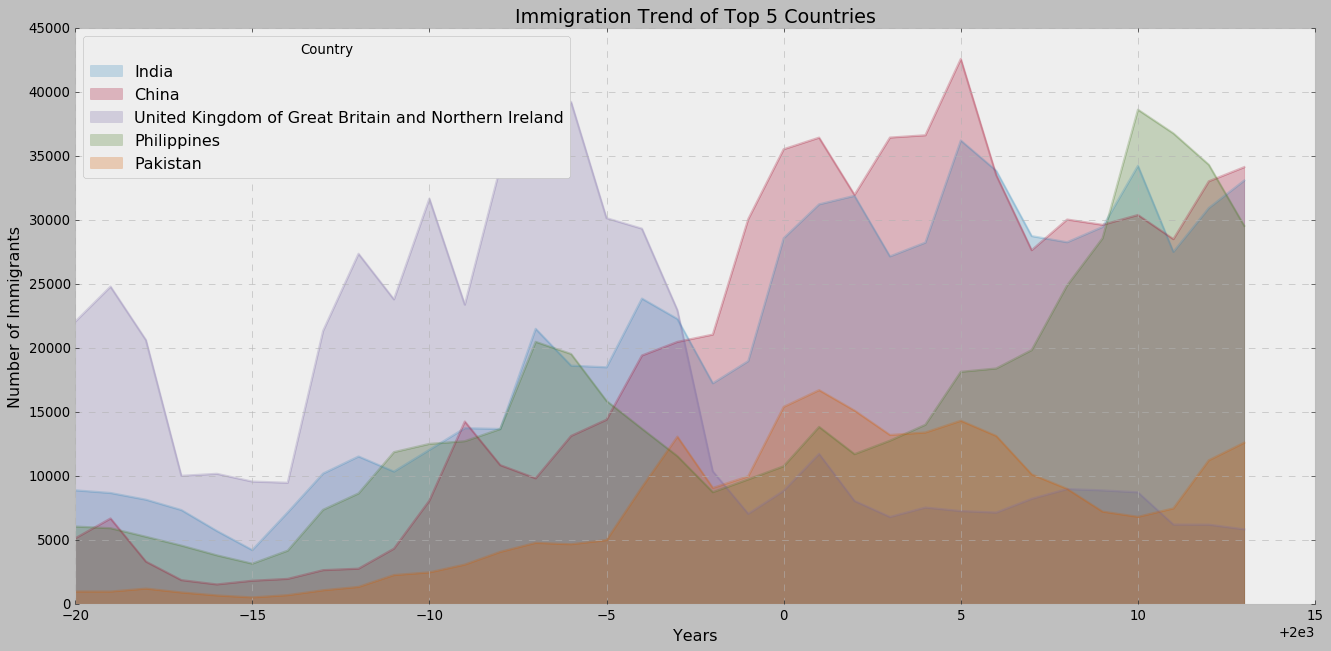

In [69]:
# create cumulative plot

df_top5.plot(kind='area', 
             stacked=False,
             alpha=0.25, # transparency lvl, 0-1, default value a= 0.5
             figsize=(20, 9), # pass a tuple (x, y) size
            ) 

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Option 2: preferred option with more flexibility - Artist Layer

Text(0.5,0,'Years')

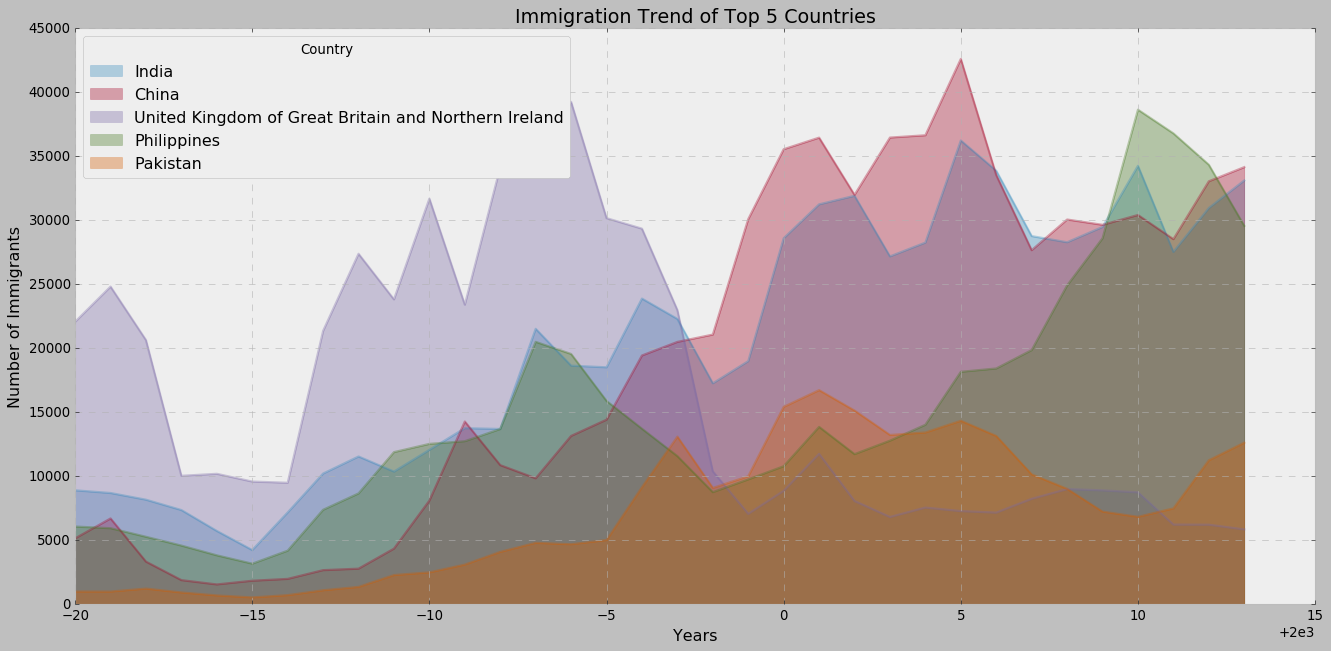

In [74]:
ax = df_top5.plot(kind='area', stacked=False, alpha=0.35, figsize=(20, 9))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms

In [75]:
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [76]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the histrogram method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

-178 countries contributed between 0 to 3412.9 immigrants
-11 countries contributed between 3412.9 to 6825.8 immigrants
-1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

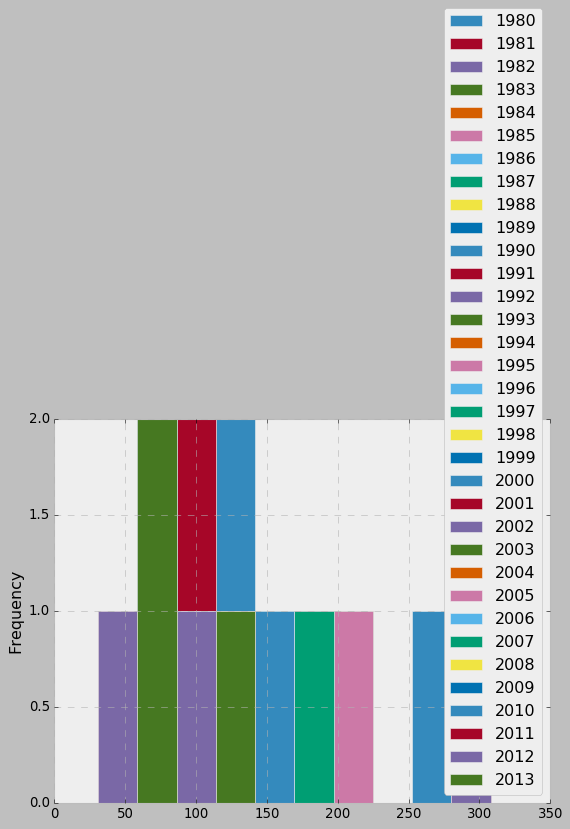

In [77]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist() #bad practice

In [79]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].T
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


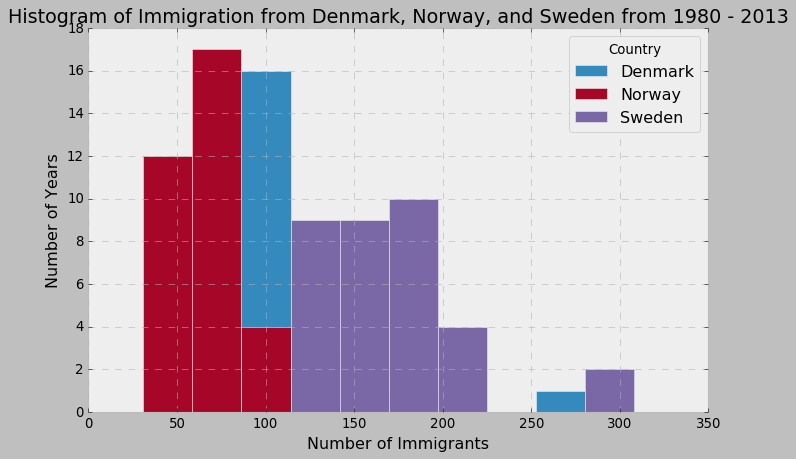

In [80]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let us make a few modifications to improve the impact and aesthetics of the previous plot:

1) increase the bin size to 15 by passing in bins parameter
2) set transparency to 60% by passing in alpha paramemter
3) label the x-axis by passing in x-label paramater
4) change the colors of the plots by passing in color parameter

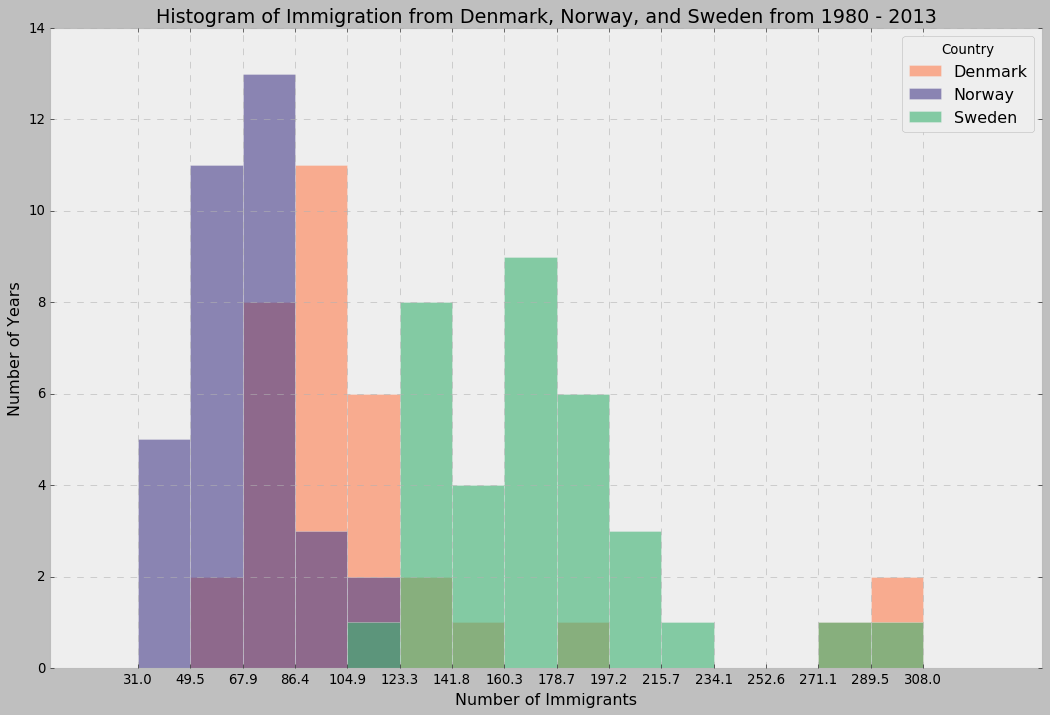

In [83]:
# Let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# Un-stacked Histogram
df_t.plot(kind ='hist', 
          figsize=(16, 10),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [84]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():  #all colors available in matplotlib
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


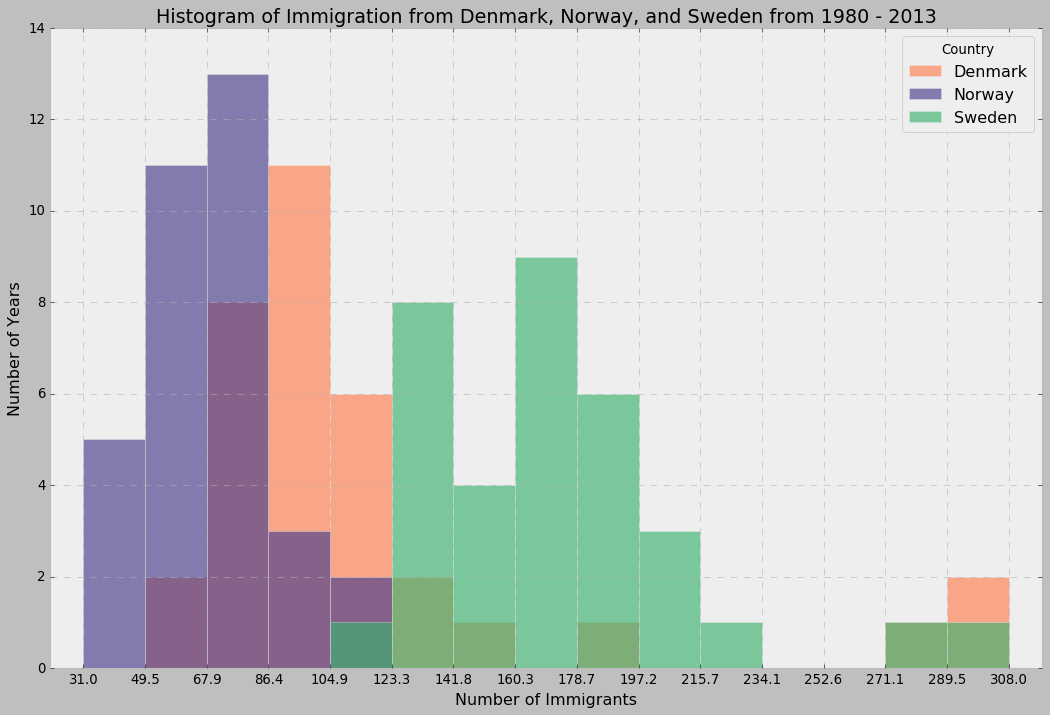

In [92]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

#Stacked Histogram
df_t.plot(kind='hist',
          figsize=(16, 10), 
          bins=15,
          xticks=bin_edges,
          color=['coral','darkslateblue','mediumseagreen'],
          stacked=False,
          alpha=0.65,
          xlim=(xmin,xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts

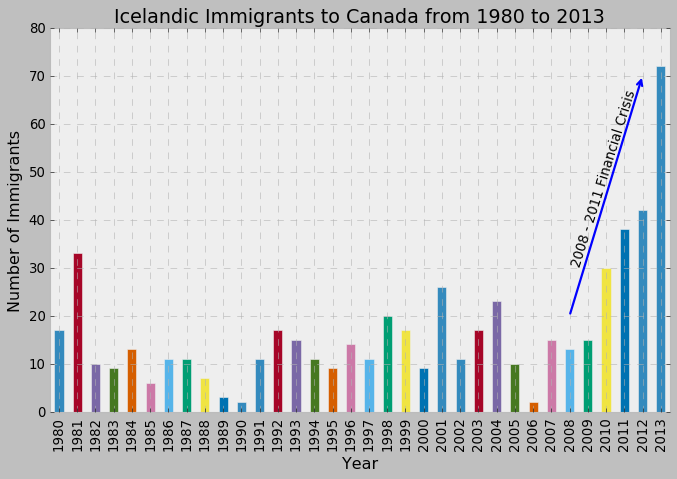

In [94]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # Place head of the arrow at point (year 2012 , pop 70 )
             xytext=(28, 20),         # Place base of the arrow at point (year 2008 , pop 20 )
             xycoords='data',         # Will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28,30),                   # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                # Based on trial and error to match the arrow
             va='bottom',                  # Want the text to be vertically 'bottom' aligned
             ha='left',                    # Want the text to be horizontally 'left' algned.
            )

plt.show()

# Horisontal bar chart

In [95]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

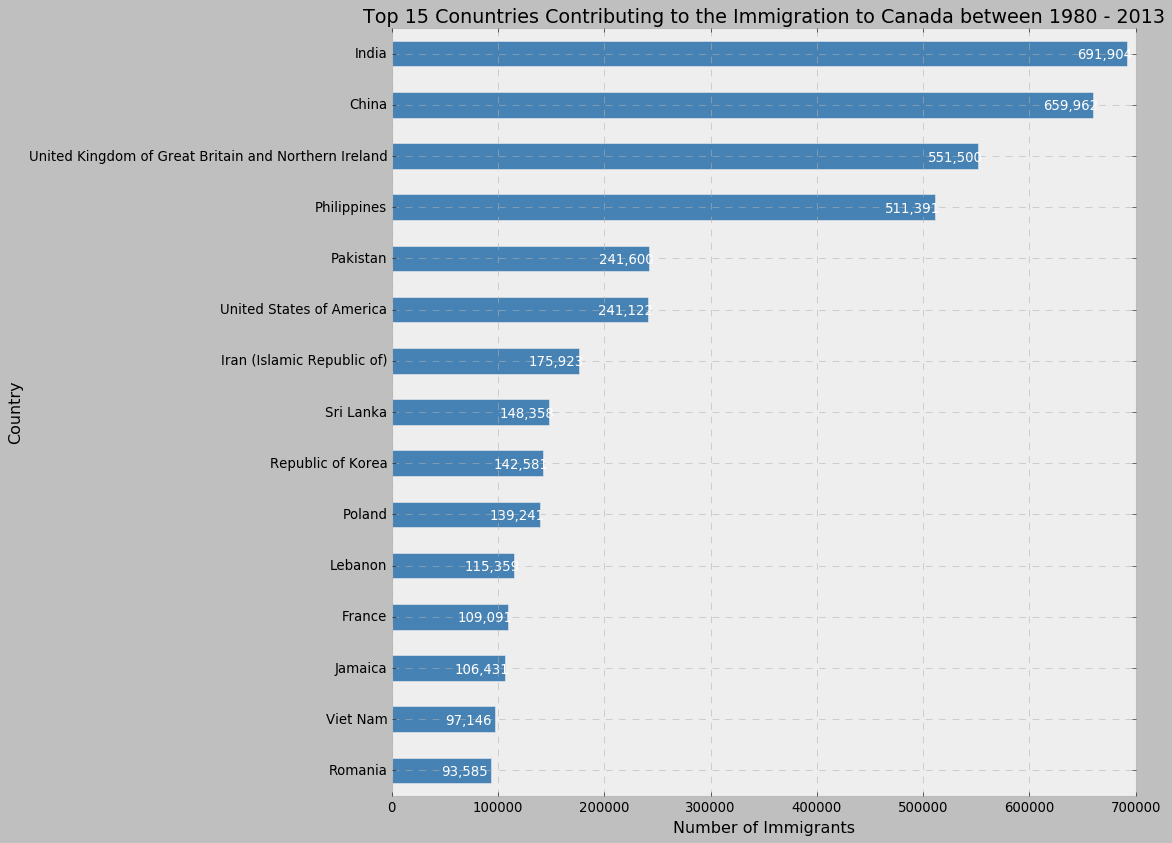

In [96]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()